Data Mining Project:
Aaron, Sami, Wicky

How to get Rich? Or not?.....

Algorithms:
1. Categorical Prediction --> Naive Bayes
2. Clustering Algorithm   --> K-Means Clustering/Hierarchial Clustering
3. Continuous Values      --> Linear Regression/Random Forest

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [5]:
#imports dataset
data = pd.read_csv('adult.csv')
data.head()

39          State-gov   77516   Bachelors  13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
1  38            Private  215646     HS-grad   9             Divorced   
2  53            Private  234721        11th   7   Married-civ-spouse   
3  28            Private  338409   Bachelors  13   Married-civ-spouse   
4  37            Private  284582     Masters  14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male  2174  0  40  \
0     Exec-managerial         Husband   White     Male     0  0  13   
1   Handlers-cleaners   Not-in-family   White     Male     0  0  40   
2   Handlers-cleaners         Husband   Black     Male     0  0  40   
3      Prof-specialty            Wife   Black   Female     0  0  40   
4     Exec-managerial            Wife   White   Female     0  0  40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [6]:
# Explicitly defined columns because the csv file didn't have column names
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num', 'Maritial-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country', 'Income']
data.head()

Age          Workclass  Fnlwgt   Education  Education-Num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

       Maritial-Status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital-Gain  Capital-Loss  Hours-Per-Week  Native-Country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [7]:
#Data PreProcessing Steps:
# Outliers
# Missing Data
# Duplicate????

#print("There are no Null/Missing Values")
data.isnull().sum()


Age                0
Workclass          0
Fnlwgt             0
Education          0
Education-Num      0
Maritial-Status    0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital-Gain       0
Capital-Loss       0
Hours-Per-Week     0
Native-Country     0
Income             0
dtype: int64

In [8]:
#This changes the obj_data into numerical by using the labelEncoder (maybe leave in maybe take out?)
obj_data = data.select_dtypes(include=['object']).copy()
int_data = data.select_dtypes(include=['int64']).copy()
df = obj_data.apply(preprocessing.LabelEncoder().fit_transform)

df.head()
#int_data.head()


Workclass  Education  Maritial-Status  Occupation  Relationship  Race  Sex  \
0          6          9                2           4             0     4    1   
1          4         11                0           6             1     4    1   
2          4          1                2           6             0     2    1   
3          4          9                2          10             5     2    0   
4          4         12                2           4             5     4    0   

   Native-Country  Income  
0              39       0  
1              39       0  
2              39       0  
3               5       0  
4              39       0

In [9]:
# Need to find and remove outliers from the dataset
#this doesn't work atm -->
df.describe()

Workclass     Education  Maritial-Status    Occupation  \
count  32560.000000  32560.000000     32560.000000  32560.000000   
mean       3.868796     10.298249         2.611794      6.572912   
std        1.455879      3.870317         1.506225      4.228809   
min        0.000000      0.000000         0.000000      0.000000   
25%        4.000000      9.000000         2.000000      3.000000   
50%        4.000000     11.000000         2.000000      7.000000   
75%        4.000000     12.000000         4.000000     10.000000   
max        8.000000     15.000000         6.000000     14.000000   

       Relationship          Race           Sex  Native-Country        Income  
count  32560.000000  32560.000000  32560.000000    32560.000000  32560.000000  
mean       1.446376      3.665848      0.669195       36.718796      0.240817  
std        1.606794      0.848817      0.470510        7.823892      0.427586  
min        0.000000      0.000000      0.000000        0.000000      0.000000  
25%        0.000000      4.000000      0.000000       39.000000      0.000000  
50%        1.000000      4.000000      1.000000       39.000000      0.000000  
75%        3.000000      4.000000      1.000000       39.000000      0.000000  
max        5.000000      4.000000      1.000000       41.000000      1.000000

In [10]:
#finding the interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Workclass          0.0
Education          3.0
Maritial-Status    2.0
Occupation         7.0
Relationship       3.0
Race               0.0
Sex                1.0
Native-Country     0.0
Income             0.0
dtype: float64


In [11]:
#the values that are 'True' represent the presence of the outlier
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

       Workclass  Education  Maritial-Status  Occupation  Relationship   Race  \
0          False      False            False       False         False  False   
1          False      False            False       False         False  False   
2          False       True            False       False         False   True   
3          False      False            False       False         False   True   
4          False      False            False       False         False  False   
...          ...        ...              ...         ...           ...    ...   
32555      False      False            False       False         False  False   
32556      False      False            False       False         False  False   
32557      False      False            False       False         False  False   
32558      False      False            False       False         False  False   
32559      False      False            False       False         False  False   

         Sex  Native-Countr

Workclass  Education  Maritial-Status  Occupation  Relationship   Race  \
0           True      False            False       False         False  False   
1          False      False            False       False         False  False   
2          False      False            False       False         False  False   
3          False      False            False       False         False  False   
4          False      False            False       False         False  False   
...          ...        ...              ...         ...           ...    ...   
32555      False      False            False       False         False  False   
32556      False      False            False       False         False  False   
32557      False      False            False       False         False  False   
32558      False      False            False       False         False  False   
32559       True      False            False       False         False  False   

         Sex  Native-Country  Income  
0      False           False   False  
1      False           False   False  
2      False           False   False  
3      False           False   False  
4      False           False   False  
...      ...             ...     ...  
32555  False           False   False  
32556  False           False    True  
32557  False           False   False  
32558  False           False   False  
32559  False           False    True  

[32560 rows x 9 columns]

I think we still need some kind of a box plot here or something??? what do you guys think?

In [12]:
#multiple regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Workclass  Education  Maritial-Status  Occupation  \
Workclass         1.000000   0.023537        -0.064798    0.255004   
Education         0.023537   1.000000        -0.038398   -0.021274   
Maritial-Status  -0.064798  -0.038398         1.000000   -0.009617   
Occupation        0.255004  -0.021274        -0.009617    1.000000   
Relationship     -0.090449  -0.010879         0.185461   -0.075620   
Race              0.049720   0.014135        -0.068025    0.006779   
Sex               0.095942  -0.027349        -0.129337    0.080328   
Native-Country   -0.007710   0.064291        -0.023827   -0.012532   
Income            0.051645   0.079311        -0.199295    0.075448   

                 Relationship      Race       Sex  Native-Country    Income  
Workclass           -0.090449  0.049720  0.095942       -0.007710  0.051645  
Education           -0.010879  0.014135 -0.027349        0.064291  0.079311  
Maritial-Status      0.185461 -0.068025 -0.129337       -0.023827 -0.199295  
Occupation          -0.075620  0.006779  0.080328       -0.012532  0.075448  
Relationship         1.000000 -0.116052 -0.582453       -0.005504 -0.250924  
Race                -0.116052  1.000000  0.087197        0.137849  0.071853  
Sex                 -0.582453  0.087197  1.000000       -0.008125  0.215995  
Native-Country      -0.005504  0.137849 -0.008125        1.000000  0.015845  
Income              -0.250924  0.071853  0.215995        0.015845  1.000000

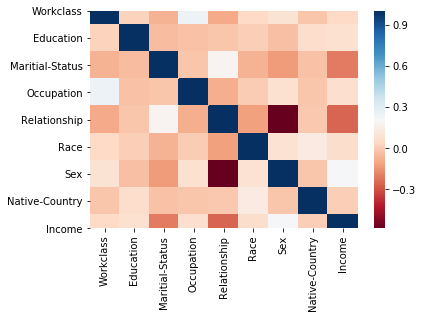

In [45]:
# calculate the correlation matrix
corr = df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [46]:
# get the summary
df.describe()

Workclass     Education  Maritial-Status    Occupation  \
count  32560.000000  32560.000000     32560.000000  32560.000000   
mean       3.868796     10.298249         2.611794      6.572912   
std        1.455879      3.870317         1.506225      4.228809   
min        0.000000      0.000000         0.000000      0.000000   
25%        4.000000      9.000000         2.000000      3.000000   
50%        4.000000     11.000000         2.000000      7.000000   
75%        4.000000     12.000000         4.000000     10.000000   
max        8.000000     15.000000         6.000000     14.000000   

       Relationship          Race           Sex  Native-Country        Income  
count  32560.000000  32560.000000  32560.000000    32560.000000  32560.000000  
mean       1.446376      3.665848      0.669195       36.718796      0.240817  
std        1.606794      0.848817      0.470510        7.823892      0.427586  
min        0.000000      0.000000      0.000000        0.000000      0.000000  
25%        0.000000      4.000000      0.000000       39.000000      0.000000  
50%        1.000000      4.000000      1.000000       39.000000      0.000000  
75%        3.000000      4.000000      1.000000       39.000000      0.000000  
max        5.000000      4.000000      1.000000       41.000000      1.000000

In [47]:
#building testing and training sets
X = df.drop('Income', axis = 1)
Y = df[['Income']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]
print("The intercept for our model is {:.4}".format(intercept))

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 0.1541
The Coefficient for Workclass is 0.002
The Coefficient for Education is 0.0083
The Coefficient for Maritial-Status is -0.043
The Coefficient for Occupation is 0.0051
The Coefficient for Relationship is -0.043
The Coefficient for Race is 0.016
The Coefficient for Sex is 0.092
The Coefficient for Native-Country is 0.00039


In [49]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[ 0.36934873],
       [ 0.2028977 ],
       [ 0.20685884],
       [-0.0273335 ],
       [ 0.09335997]])

In [50]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.162
MAE 0.329
RMSE 0.402


In [51]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.096
